In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
product_df= pd.read_excel("datawise_case_study_data.xlsx")
df = product_df.copy()

## 	Describe the data given, highlighting facts at first look. 

In [3]:
df.sample(5)

,Unique Product Code,Product Name,Date,Location1 Sales,Location2 Sales
6,2,productY,Jan2018,38,87.0
24,1,prouctX,Apr2019,86,13.0
0,3,productZ,Mar2019,79,98.0
18,3,productZ,Feb2019,29,40.0
23,2,product.Y,Apr2018,59,14.0


In [4]:
df.rename(columns={'Location1 Sales': 'Location1',
                   'Location2 Sales': 'Location2'},
          inplace=True,)

In [5]:
[col.replace(" ","_") for col in df.columns]

['Unique_Product_Code', 'Product_Name', 'Date', 'Location1', 'Location2']

In [6]:
df.columns = [col.replace(" ","_") for col in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unique_Product_Code  27 non-null     int64  
 1   Product_Name         27 non-null     object 
 2   Date                 27 non-null     object 
 3   Location1            27 non-null     int64  
 4   Location2            26 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ KB


In [8]:
df[df.duplicated()]

,Unique_Product_Code,Product_Name,Date,Location1,Location2
12,3,productZ,Jan2018,35,65.0


In [9]:
df = df.drop_duplicates()

In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False),2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
Location2,1,3.85
Unique_Product_Code,0,0.00
Product_Name,0,0.00
Date,0,0.00
Location1,0,0.00


In [11]:
df["Location2"].fillna(0)

0     98.0
1     96.0
2     95.0
3     95.0
4     93.0
5     92.0
6     87.0
7     82.0
8     77.0
9     77.0
10    70.0
11    65.0
13    52.0
14    51.0
15    46.0
16    44.0
17    41.0
18    40.0
19    38.0
20    25.0
21    22.0
22    22.0
23    14.0
24    13.0
25     9.0
26     0.0
Name: Location2, dtype: float64

In [12]:
df["Location2"] = df["Location2"].fillna(0)

In [13]:
df["Location2"] = df["Location2"].astype("int32")

In [14]:
df.Product_Name.value_counts()

productZ     8
productY     7
prouctX      6
prouct-X     3
product.Y    2
Name: Product_Name, dtype: int64

In [15]:
df.Product_Name.apply(lambda x:str(x).replace(".","").replace("-","").replace("prouctX","productX"))

0     productZ
1     productY
2     productZ
3     productX
4     productZ
5     productY
6     productY
7     productZ
8     productX
9     productX
10    productX
11    productZ
13    productY
14    productZ
15    productX
16    productX
17    productY
18    productZ
19    productX
20    productX
21    productY
22    productZ
23    productY
24    productX
25    productY
26    productY
Name: Product_Name, dtype: object

In [16]:
df["Product_Name"] = df["Product_Name"].apply(lambda x:str(x).replace(".","").replace("-","").replace("prouctX","productX"))

In [17]:
df

,Unique_Product_Code,Product_Name,Date,Location1,Location2
0,3,productZ,Mar2019,79,98
1,2,productY,Mar2018,1,96
2,3,productZ,Apr2019,64,95
3,1,productX,Feb2018,15,95
4,3,productZ,Feb2018,6,93
5,2,productY,Mar2019,27,92
6,2,productY,Jan2018,38,87
7,3,productZ,Mar2018,11,82
8,1,productX,Jan2018,82,77
9,1,productX,Jan2018,82,77


##	Unify data & explain the assumptions for your steps in unification. 
* Unify "Product Name" using the following format "productX".
* Unique Product Code ---> Product Code integer
* Date ---> month and year format
* Location1 Sales --> amount of product sold at the location1
* Location2 Sales --> amount of product sold at the location2

##	Change table format from i to ii (New format should have locations in row instead of column)

In [18]:
new_df = pd.melt(df, id_vars=['Unique_Product_Code', 'Product_Name', 'Date'], value_vars=['Location1', 'Location2'], var_name='Location', value_name='sales')
new_df

,Unique_Product_Code,Product_Name,Date,Location,sales
0,3,productZ,Mar2019,Location1,79
1,2,productY,Mar2018,Location1,1
2,3,productZ,Apr2019,Location1,64
3,1,productX,Feb2018,Location1,15
4,3,productZ,Feb2018,Location1,6
5,2,productY,Mar2019,Location1,27
6,2,productY,Jan2018,Location1,38
7,3,productZ,Mar2018,Location1,11
8,1,productX,Jan2018,Location1,82
9,1,productX,Jan2018,Location1,82


##  Date
* a.) Extract month and year from "date" column; create new colmns for "month", "year". 
* b.) Create a "newdate" column from "date" column with the following date format: "1.01.2018".


### a.) Extract month and year from "date" column; create new colmns for "month", "year". 

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unique_Product_Code  52 non-null     int64 
 1   Product_Name         52 non-null     object
 2   Date                 52 non-null     object
 3   Location             52 non-null     object
 4   sales                52 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
new_df["Date"]= new_df["Date"].astype("datetime64")

In [21]:
new_df["Date"]

0    2019-03-01
1    2018-03-01
2    2019-04-01
3    2018-02-01
4    2018-02-01
5    2019-03-01
6    2018-01-01
7    2018-03-01
8    2018-01-01
9    2018-01-01
10   2018-03-01
11   2018-01-01
12   2019-02-01
13   2018-04-01
14   2019-01-01
15   2018-04-01
16   2019-01-01
17   2019-02-01
18   2019-02-01
19   2019-03-01
20   2019-04-01
21   2019-01-01
22   2018-04-01
23   2019-04-01
24   2018-02-01
25   2019-03-01
26   2019-03-01
27   2018-03-01
28   2019-04-01
29   2018-02-01
30   2018-02-01
31   2019-03-01
32   2018-01-01
33   2018-03-01
34   2018-01-01
35   2018-01-01
36   2018-03-01
37   2018-01-01
38   2019-02-01
39   2018-04-01
40   2019-01-01
41   2018-04-01
42   2019-01-01
43   2019-02-01
44   2019-02-01
45   2019-03-01
46   2019-04-01
47   2019-01-01
48   2018-04-01
49   2019-04-01
50   2018-02-01
51   2019-03-01
Name: Date, dtype: datetime64[ns]

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unique_Product_Code  52 non-null     int64         
 1   Product_Name         52 non-null     object        
 2   Date                 52 non-null     datetime64[ns]
 3   Location             52 non-null     object        
 4   sales                52 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.2+ KB


In [23]:
new_df["Date"].dt.month

0     3
1     3
2     4
3     2
4     2
5     3
6     1
7     3
8     1
9     1
10    3
11    1
12    2
13    4
14    1
15    4
16    1
17    2
18    2
19    3
20    4
21    1
22    4
23    4
24    2
25    3
26    3
27    3
28    4
29    2
30    2
31    3
32    1
33    3
34    1
35    1
36    3
37    1
38    2
39    4
40    1
41    4
42    1
43    2
44    2
45    3
46    4
47    1
48    4
49    4
50    2
51    3
Name: Date, dtype: int64

In [24]:
new_df["Date"].dt.year

0     2019
1     2018
2     2019
3     2018
4     2018
5     2019
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2019
13    2018
14    2019
15    2018
16    2019
17    2019
18    2019
19    2019
20    2019
21    2019
22    2018
23    2019
24    2018
25    2019
26    2019
27    2018
28    2019
29    2018
30    2018
31    2019
32    2018
33    2018
34    2018
35    2018
36    2018
37    2018
38    2019
39    2018
40    2019
41    2018
42    2019
43    2019
44    2019
45    2019
46    2019
47    2019
48    2018
49    2019
50    2018
51    2019
Name: Date, dtype: int64

In [25]:
new_df["Month"] = new_df["Date"].dt.month
new_df["Year"] = new_df["Date"].dt.year


### b) Create a "newdate" column from "date" column with the following date format: "1.01.2018".

In [26]:
new_df["Date"].dt.strftime("%d-%m-%Y")

0     01-03-2019
1     01-03-2018
2     01-04-2019
3     01-02-2018
4     01-02-2018
5     01-03-2019
6     01-01-2018
7     01-03-2018
8     01-01-2018
9     01-01-2018
10    01-03-2018
11    01-01-2018
12    01-02-2019
13    01-04-2018
14    01-01-2019
15    01-04-2018
16    01-01-2019
17    01-02-2019
18    01-02-2019
19    01-03-2019
20    01-04-2019
21    01-01-2019
22    01-04-2018
23    01-04-2019
24    01-02-2018
25    01-03-2019
26    01-03-2019
27    01-03-2018
28    01-04-2019
29    01-02-2018
30    01-02-2018
31    01-03-2019
32    01-01-2018
33    01-03-2018
34    01-01-2018
35    01-01-2018
36    01-03-2018
37    01-01-2018
38    01-02-2019
39    01-04-2018
40    01-01-2019
41    01-04-2018
42    01-01-2019
43    01-02-2019
44    01-02-2019
45    01-03-2019
46    01-04-2019
47    01-01-2019
48    01-04-2018
49    01-04-2019
50    01-02-2018
51    01-03-2019
Name: Date, dtype: object

In [27]:
new_df["NewDate"] = new_df["Date"].dt.strftime("%d-%m-%Y")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 26
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unique_Product_Code  26 non-null     int64 
 1   Product_Name         26 non-null     object
 2   Date                 26 non-null     object
 3   Location1            26 non-null     int64 
 4   Location2            26 non-null     int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 1.1+ KB


In [29]:
new_df["Date"]=new_df["Date"].dt.strftime("%b%Y")

In [30]:
new_df.sample(10)

,Unique_Product_Code,Product_Name,Date,Location,sales,Month,Year,NewDate
51,2,productY,Mar2019,Location2,0,3,2019,01-03-2019
32,2,productY,Jan2018,Location2,87,1,2018,01-01-2018
48,2,productY,Apr2018,Location2,14,4,2018,01-04-2018
30,3,productZ,Feb2018,Location2,93,2,2018,01-02-2018
40,1,productX,Jan2019,Location2,46,1,2019,01-01-2019
44,1,productX,Feb2019,Location2,38,2,2019,01-02-2019
16,2,productY,Jan2019,Location1,53,1,2019,01-01-2019
42,2,productY,Jan2019,Location2,41,1,2019,01-01-2019
49,1,productX,Apr2019,Location2,13,4,2019,01-04-2019
10,1,productX,Mar2018,Location1,65,3,2018,01-03-2018


## Load the second dataset where population data of locations in different years are given. (document name: datawise_case_study_additionaldata) 

In [31]:
population=pd.read_excel("datawise_case_study_additionaldata.xlsx")
df_pop = population.copy()

In [32]:
df_pop.head()

,Location,Year,Population
0,Location1,2018,5109
1,Location1,2019,3528
2,Location2,2018,9806
3,Location2,2019,1740


## Merge the additional data of location population to the current data you were working on. Output should be in the following structure:

In [46]:
df_final = pd.merge(new_df, df_pop, how='left', on=["Location","Year"])
df_final

,Unique_Product_Code,Product_Name,Date,Location,sales,Month,Year,NewDate,Population
0,3,productZ,Mar2019,Location1,79,3,2019,01-03-2019,3528
1,2,productY,Mar2018,Location1,1,3,2018,01-03-2018,5109
2,3,productZ,Apr2019,Location1,64,4,2019,01-04-2019,3528
3,1,productX,Feb2018,Location1,15,2,2018,01-02-2018,5109
4,3,productZ,Feb2018,Location1,6,2,2018,01-02-2018,5109
5,2,productY,Mar2019,Location1,27,3,2019,01-03-2019,3528
6,2,productY,Jan2018,Location1,38,1,2018,01-01-2018,5109
7,3,productZ,Mar2018,Location1,11,3,2018,01-03-2018,5109
8,1,productX,Jan2018,Location1,82,1,2018,01-01-2018,5109
9,1,productX,Jan2018,Location1,82,1,2018,01-01-2018,5109


## Calculate “Weighted Average” of product sales by using population as weight. In other words, we need average sales of each product regardless of date and location, but the average should be calculated with the weight for each location’s population.




In [37]:
df_final.groupby(by=["Product_Name"]).sales.sum()

Product_Name
productX    996
productY    763
productZ    888
Name: sales, dtype: int64

##  Create a summary table in the following format:

In [39]:
df_final.head(1)

,Unique_Product_Code,Product_Name,Date,Location,sales,Month,Year,NewDate,Population
0,3,productZ,Mar2019,Location1,79,3,2019,01-03-2019,3528


In [71]:
df_summary = df_final.groupby(by=["Location","Month"]).agg({"sales":["sum","mean"]})
df_summary.columns = ["_".join(x) for x in df_summary.columns.ravel()]
df_summary.reset_index(inplace=True)
df_summary["sales_mean"]=df_summary["sales_mean"].map(lambda x:round(x,2))

C:\Users\furkanpc\AppData\Local\Temp/ipykernel_21772/270221425.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_summary.columns = ["_".join(x) for x in df_summary.columns.ravel()]


In [73]:
df_summary

,Location,Month,sales_sum,sales_mean
0,Location1,1,325,46.43
1,Location1,2,215,35.83
2,Location1,3,219,31.29
3,Location1,4,444,74.00
4,Location2,1,415,59.29
5,Location2,2,327,54.50
6,Location2,3,463,66.14
7,Location2,4,239,39.83


## Use the summary table to create a plot that has following features with ggplot/ggplot2 package.

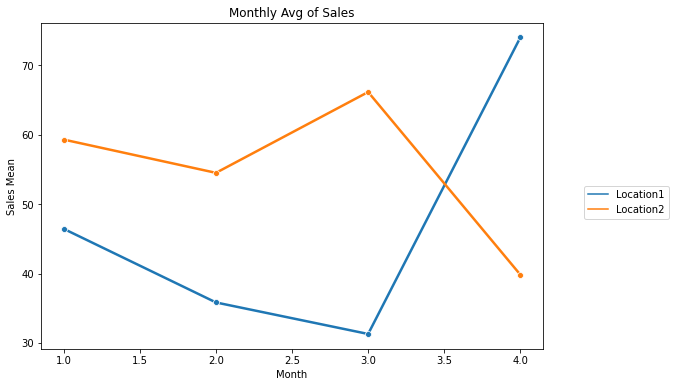

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(x=df_summary.Month, y=df_summary.sales_mean, hue=df_summary.Location,
              marker="o",
            linewidth=2.5);
plt.ylabel("Sales Mean")
plt.xlabel("Month")
plt.title("Monthly Avg of Sales")
plt.legend(bbox_to_anchor = (1.25, 0.5), borderaxespad = 0);


## Create 3 different tables to visualize the data & analyze the data using visualization.



In [82]:
df_product_loc = df_final.groupby(by=["Product_Name","Location"])[["sales"]].sum()
df_product_loc.reset_index(inplace=True)
df_product_loc

,Product_Name,Location,sales
0,productX,Location1,511
1,productX,Location2,485
2,productY,Location1,350
3,productY,Location2,413
4,productZ,Location1,342
5,productZ,Location2,546


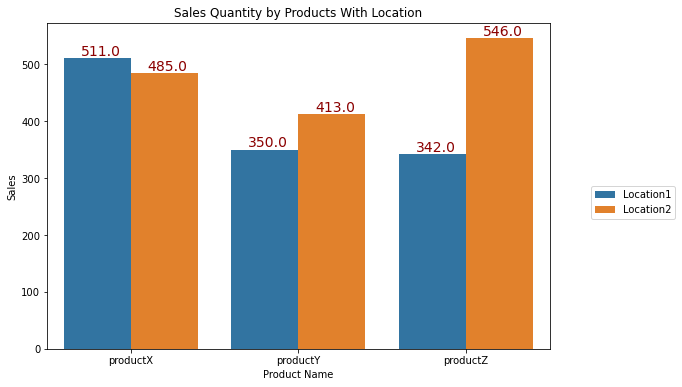

In [107]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(x="Product_Name", y="sales", hue="Location", data=df_product_loc)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+5),color ="darkred",size=14)
    
plt.ylabel("Sales")
plt.xlabel("Product Name")
plt.title("Sales Quantity by Products With Location")
plt.legend(bbox_to_anchor = (1.25, 0.5), borderaxespad = 0);

In [98]:
df_final.head()

,Unique_Product_Code,Product_Name,Date,Location,sales,Month,Year,NewDate,Population
0,3,productZ,Mar2019,Location1,79,3,2019,01-03-2019,3528
1,2,productY,Mar2018,Location1,1,3,2018,01-03-2018,5109
2,3,productZ,Apr2019,Location1,64,4,2019,01-04-2019,3528
3,1,productX,Feb2018,Location1,15,2,2018,01-02-2018,5109
4,3,productZ,Feb2018,Location1,6,2,2018,01-02-2018,5109


In [102]:
df_year_sales  = df_final.groupby(by=["Year","Location"]).agg({"sales":["sum"]})
df_year_sales.columns = ["_".join(x) for x in df_year_sales.columns.ravel()]
df_year_sales.reset_index(inplace=True)
df_year_sales

C:\Users\furkanpc\AppData\Local\Temp/ipykernel_21772/1257322630.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_year_sales.columns = ["_".join(x) for x in df_year_sales.columns.ravel()]


,Year,Location,sales_sum
0,2018,Location1,640
1,2018,Location2,860
2,2019,Location1,563
3,2019,Location2,584


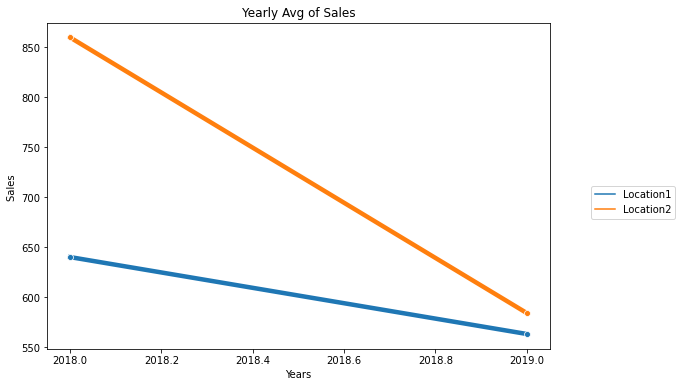

In [109]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(x=df_year_sales.Year, y=df_year_sales.sales_sum, hue=df_year_sales.Location,
              marker="o",
            linewidth=4.5)



plt.ylabel("Sales ")
plt.xlabel("Years")
plt.title("Yearly Avg of Sales")
plt.legend(bbox_to_anchor = (1.25, 0.5), borderaxespad = 0);

In [110]:
df_final.head()

,Unique_Product_Code,Product_Name,Date,Location,sales,Month,Year,NewDate,Population
0,3,productZ,Mar2019,Location1,79,3,2019,01-03-2019,3528
1,2,productY,Mar2018,Location1,1,3,2018,01-03-2018,5109
2,3,productZ,Apr2019,Location1,64,4,2019,01-04-2019,3528
3,1,productX,Feb2018,Location1,15,2,2018,01-02-2018,5109
4,3,productZ,Feb2018,Location1,6,2,2018,01-02-2018,5109


In [113]:
df_product_population = df_final.groupby(by=["Product_Name","Location"]).agg({"sales":["sum","mean"],"Population":["mean"]})
df_product_population.reset_index(inplace=True)
df_product_population

Product_Name   Location sales              Population
                            sum       mean         mean
0     productX  Location1   511  56.777778  4406.333333
1     productX  Location2   485  53.888889  6221.111111
2     productY  Location1   350  38.888889  4230.666667
3     productY  Location2   413  45.888889  5324.888889
4     productZ  Location1   342  42.750000  4318.500000
5     productZ  Location2   546  68.250000  5773.000000

In [ ]:
df_summary = df_final.groupby(by=["Location","Month"]).agg({"sales":["sum","mean"]})